# TP2

Ce TP est inspiré du tutoriel Pytorch disponible [ici](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html). Le but est d'apprendre à manier les "tensors" et leur backpropagation.

In [1]:
%matplotlib inline


# Tensors

Les tensors sont une structure de données spécialisée très similaire aux tableaux
et des matrices. Dans PyTorch, nous utilisons des tenseurs pour coder les entrées et
les sorties d’un modèle, ainsi que les paramètres du modèle.

Les tenseurs sont similaires aux ndarrays de NumPy, sauf qu'ils peuvent s'exécuter sur
GPU ou autre matériel spécialisé pour accélérer le calcul.


In [31]:
#!pip install torch

In [32]:
import torch
import numpy as np

## Tensor Initialization
Les tenseurs peuvent être initialisés de différentes manières. Jetez un œil aux exemples suivants :

**Directement à partir des données**

Les tenseurs peuvent être créés directement à partir des données. Le type de données est automatiquement déduit.



In [33]:
data = [[1, 2], [3, 4]]
x_data = torch.tensor(data)


**À partir d'un tableau NumPy**

Les tenseurs peuvent être créés à partir de tableaux NumPy (et vice versa - voir les sections suivantes).



In [34]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

**Avec des valeurs aléatoires ou constantes :**

``shape`` est un tuple de dimensions tensorielles. Dans les fonctions ci-dessous, il détermine la dimensionnalité du tenseur de sortie.


In [35]:
shape = (2, 3)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)
norm_tensor = torch.norm(rand_tensor)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")
print(f"Norm Tensor: \n {norm_tensor}")

Random Tensor: 
 tensor([[0.5821, 0.2359, 0.9546],
        [0.2387, 0.9663, 0.1276]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])
Norm Tensor: 
 1.5207823514938354


**À partir d'un autre tenseur :**

Le nouveau tenseur conserve les propriétés (forme, type de données) du tenseur d'argument, à moins qu'il ne soit explicitement remplacé.



In [36]:
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.6930, 0.6326],
        [0.9115, 0.1968]]) 



--------------




## Tensor Operations


Plus de 100 opérations tensorielles, dont la transposition, l'indexation, le découpage,
les opérations mathématiques, l'algèbre linéaire, l'échantillonnage aléatoire, etc. sont décrits en détail
[ici](https://pytorch.org/docs/stable/torch.html)_.




Ci-dessous, quelques exemples.




**Standard numpy-like indexing and slicing:**



In [37]:
tensor = torch.ones(4, 4)
tensor[:,1] = 0
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


**Joining tensors** You can use ``torch.cat`` to concatenate a sequence of tensors along a given dimension.
See also [torch.stack](https://pytorch.org/docs/stable/generated/torch.stack.html)_,
another tensor joining op that is subtly different from ``torch.cat``.



In [38]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


**Multiplying tensors**



In [39]:
# This computes the element-wise product
print(f"tensor.mul(tensor) \n {tensor.mul(tensor)} \n")
# Alternative syntax:
print(f"tensor * tensor \n {tensor * tensor}")

tensor.mul(tensor) 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor * tensor 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


This computes the matrix multiplication between two tensors



In [40]:
print(f"tensor.matmul(tensor.T) \n {tensor.matmul(tensor.T)} \n")
# Alternative syntax:
print(f"tensor @ tensor.T \n {tensor @ tensor.T}")

tensor.matmul(tensor.T) 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]]) 

tensor @ tensor.T 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])


**In-place operations**
Operations that have a ``_`` suffix are in-place. For example: ``x.copy_(y)``, ``x.t_()``, will change ``x``.



--------------





## Bridge with NumPy
Tensors on the CPU and NumPy arrays can share their underlying memory
locations, and changing one will change	the other.



### Tensor to NumPy array



In [41]:
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


A change in the tensor reflects in the NumPy array.



In [42]:
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


### NumPy array to Tensor



In [43]:
n = np.ones(5)
t = torch.from_numpy(n)

Changes in the NumPy array reflects in the tensor.



In [44]:
np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]



# Une introduction à ``torch.autograd``

``torch.autograd`` est le module de différenciation automatique de PyTorch qui permet d'entraîner les réseaux de neurones.

## Background

Les réseaux de neurones (NN) sont un ensemble de fonctions imbriquées qui sont
exécutées sur une donnée d'entrée. Ces fonctions sont définies par des **paramètres** (composés de poids et de biais), qui dans PyTorch sont stockés dans des tenseurs.

L'entraînement d'un NN se déroule en deux étapes :

**Forward propagation** :  Il exécute les données d'entrée dans chacune de ses
fonctions.

**Backward propagation** : Pour calculer le gradient de chaque paramètre, le réseau est parcouru en arrière à partir de la sortie, en collectant les dérivées de l'erreur à chaque couche.




## Differentiation in Autograd

Jetons un coup d'œil à la façon dont ``autograd`` collecte les gradients. On crée deux tenseurs ``a`` et ``b`` avec
``requires_grad=True``. Cela signale à ``autograd`` que chaque opération sur eux doit être suivie.



In [45]:
import torch

a = torch.tensor([2., 3.], requires_grad=True)
b = torch.tensor([6., 4.], requires_grad=True)

On créé ensuite le tenseur ``Q`` (à partir de ``a`` et ``b``).

\begin{align}Q = 3a^3 - b^2\end{align}



In [46]:
Q = 3*a**3 - b**2

On a alors :

\begin{align}\nabla_{a}Q = 9a^2\end{align}

\begin{align}\nabla_{b}Q = -2b\end{align}


Lorsque nous appelons ``.backward()`` sur ``Q``, autograd calcule ces gradients
et les stocke dans l'attribut ``.grad`` des tenseurs respectifs.

Nous devons passer explicitement un argument ``gradient`` dans ``Q.backward()`` car c'est un vecteur.
``gradient`` est un tenseur de la même forme que ``Q``, et il représente le
gradient de Q par rapport à lui-même, c'est-à-dire

\begin{align}\nabla_Q Q = \begin{pmatrix}1 \\ \vdots \\ 1\end{pmatrix}\end{align}


Quand Q est un réel, cet argument n'est pas obligatoire alors une astuce est de faire ``Q.sum().backward()``.



In [47]:
external_grad = torch.tensor([1., 1.])
Q.backward(gradient=external_grad)

#or : Q.sum().backward()

Gradients are now deposited in ``a.grad`` and ``b.grad``



In [48]:
# check if collected gradients are correct
print(9*a**2 == a.grad)
print(-2*b == b.grad)

tensor([True, True])
tensor([True, True])


 <font color='blue'> **Question** : Exécuter la cellule ci-dessous. Expliquer l'erreur. Comment l'éviter ? </font>

In [51]:
a = torch.tensor([2., 3.], requires_grad=True)
b = torch.tensor([6., 4.], requires_grad=True)

Q = 3*a**3 - b**2

Q.sum().backward(retain_graph=True)

Q.sum().backward()

 <font color='blue'> **Question** : Expliquer la cellule suivante. A quoi faut-il faire attention pour calculer plusieurs gradients de suite ?  </font>

In [55]:
a = torch.tensor([2., 3.], requires_grad=True)
b = torch.tensor([6., 4.], requires_grad=True)

# First backward
Q = 3*a**3 - b**2
Q.sum().backward()

print(a.grad)

a.grad *=0 #Si on n'annule pas le gradient entre temps, Pytorch somme tout !

# Second backward
Q = 3*a**3 - b**2
Q.sum().backward()

print(a.grad)

tensor([36., 81.])
tensor([36., 81.])


## Usage in PyTorch


Jetons un coup d'œil à une seule étape d'entraînement.
Pour cet exemple, nous chargeons un modèle resnet18 pré-entraîné depuis ``torchvision``.
Nous créons un tenseur de données aléatoires pour représenter une seule image.


In [56]:
import torch
from torchvision.models import resnet18, ResNet18_Weights
model = resnet18(weights=ResNet18_Weights.DEFAULT)
data = torch.rand(1, 3, 64, 64)
# si on voulait envoyer 10 images, on aurait pu envoyer data = torch.rand(10, 3, 64, 64)
labels = torch.rand(1, 1000)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 147MB/s]


 <font color='blue'> **Question** : Expliquer la cellule précédente. Resnet18 est un réseau de classification. Quelles sont les tailles des images sur lesquelles il travaille ? Combien y a-t-il de couches ? </font>

### Forward pass

Ensuite, nous exécutons les données d'entrée dans le modèle à travers chacune de ses couches pour faire une prédiction.
C'est le **forward pass**.




In [57]:
prediction = model(data) # forward pass
print(torch.argmax(prediction))

tensor(463)


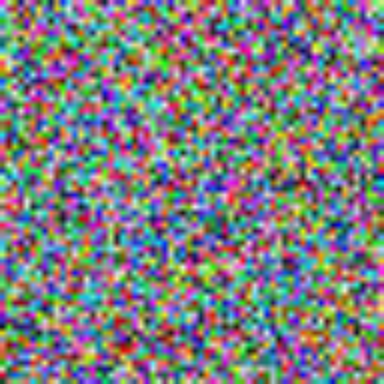

In [58]:
from torchvision.transforms.functional import to_tensor, to_pil_image
from torchvision.transforms import Resize
from IPython.display import display
change = Resize((64*6,64*6))
data_image = to_pil_image(change(data[0,:,:,:]))
display(data_image)

<ipython-input-61-da0fd2956923>:2: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  plt.plot(torch.nn.functional.softmax(prediction[0].detach()).numpy(),'o')


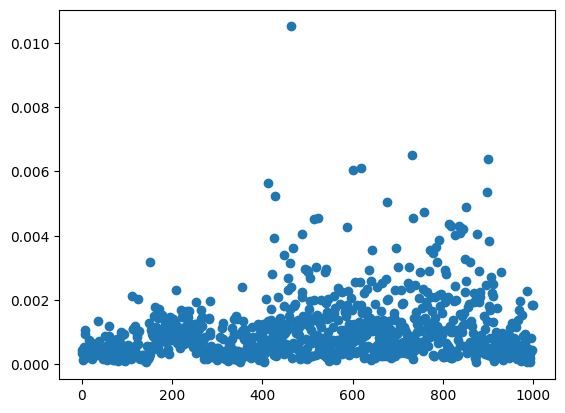

In [61]:
import pylab as plt
plt.plot(torch.nn.functional.softmax(prediction[0].detach()).numpy(),'o')
plt.show()

<font color='blue'> **Question** : A quelle classe appartiennent la donnée selon le modèle ? ([Un lien](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a)) </font>

### Backward pass



Nous utilisons la prédiction du modèle et l'étiquette correspondante pour calculer l'erreur (``loss``).
L'étape suivante consiste à rétropropager cette erreur à travers le réseau.
La backpropagation est déclenchée lorsque nous appelons ``.backward()`` sur le tenseur d'erreur.
Autograd calcule et stocke ensuite les gradients pour chaque paramètre du modèle dans l'attribut ``.grad`` du paramètre.




In [62]:
loss = ((prediction - labels)**2).sum()
loss.backward() # backward pass

Ensuite, nous chargeons un optimiseur avec un taux d'apprentissage de 0,01. Nous enregistrons tous les paramètres du modèle dans l'optimiseur.




In [63]:
optim = torch.optim.SGD(model.parameters(), lr=1e-2)

<font color='blue'> **Question** : Que signifie SGD ? </font>


Enfin, nous appelons ``.step()`` pour lancer la descente de gradient. L'optimiseur ajuste chaque paramètre par son dégradé stocké dans ``.grad``.

Tout cela est automatique !




In [64]:
optim.step() #gradient descent

Voici donc comment s'écrira un entraînement de réseau :    

Jusqu'à convergence :    
- Pour chaque batch $\mathcal{S} \subset \mathcal{T}$
    - prediction = model($\mathcal{S}$)
    - Calculer Loss($\mathcal{S}$, prediction)
    - optim.step()
    - <font color='blue'> Mettre les gradients à zéro ! </font>

--------------




# <font color='blue'> Exercice</font>

Résolvons $Ax = b$
avec
$$
A = \begin{pmatrix}
   2 & -1 & 0 & 0 & \cdots & 0 & 0\\
   -1 & 2 & -1 & 0 &\cdots & 0 & 0 \\
   0 & -1 & 2 & -1 &\cdots & 0 & 0 \\
   0 & 0 & -1 & 2 &\cdots & 0 & 0 \\
   \vdots  & \vdots & \vdots & \vdots& \ddots & \vdots & \vdots  \\
   0 & 0 & 0 & 0 & \cdots & 2 & -1 \\
   0 & 0 & 0 & 0 & \cdots & -1 & 2
 \end{pmatrix} \in \mathbb{R}^{n \times n} = \mathscr{M}_n(\mathbb{R})
 \text{ and }
 b =
 \begin{pmatrix}
 1 \\
 1 \\
 \vdots \\
 1 \\
 1
 \end{pmatrix} \in \mathbb{R}^n
$$

Il est suffisant de minimiser la fonction :       
$$F : x \in \mathbb{R}^n \mapsto \frac{1}{2}\langle Ax,x \rangle - \langle b, x \rangle$$

1. Implémentez la matrice ```A``` et le vecteur ```b``` dans ```torch``` avec $n = 20$
2. Calculez le gradient d'un vecteur aléatoire ```x``` avec ```torch.autograd```
3. Vérifiez que le calcul du gradient est correct.
4. Implémenter une descente de gradient à pas constant pour résoudre le problème avec ```10**3``` itérations et un taux d'apprentissage égal à ```0.1``` .
5. Implémentez-le en utilisant ```torch.optim.SGD```, un taux d'apprentissage égal à 0,1, un momentum égal à 0,9 et ```10**3``` itérations.
6. Tracez la solution $x$. Reconnaissez-vous $A$ ? Expliquez la forme de la courbe.

**Questions supplémentaires :**
7. Pourquoi suffit-il de minimiser $F$ pour résoudre le problème ?
8. Justifiez que $A$ est définitie positive.

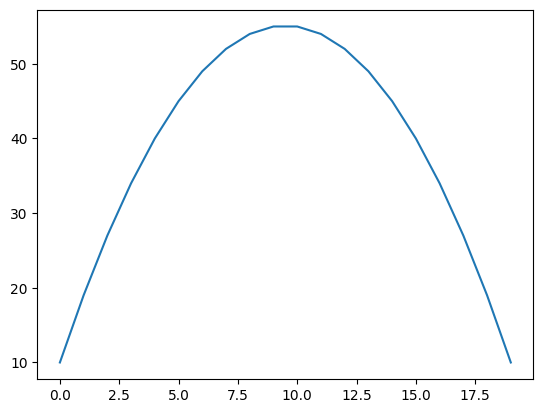

In [91]:
#######1.

n = 20

A = torch.zeros(n,n)

for k in range(n) :
  A[k,k] = 2
  if k < n-1 :
    A[k,k+1] = A[k+1,k] = -1

#A = torch.tensor(2*np.eye(n)  -np.eye(n,n,1) -np.eye(n,n,-1))

#print(A)

b = torch.ones(n)
b = torch.zeros(n) +1.


#######2.

x = torch.randn(n,requires_grad=True)
F = 1/2*((A.matmul(x))*x).sum() - (b*x).sum()
F.backward()
#print(x.grad)

#######3.

#print(A.matmul(x)-b)

#######4.

Nit = 10**3
lr = 0.1

x= torch.randn(n,requires_grad=True)

for k in range(Nit) :
  x = x.detach().requires_grad_()
  F = 1/2*((A.matmul(x))*x).sum() - (b*x).sum()
  F.backward()
  with torch.no_grad():
    x = x-lr*x.grad
  #x.grad *= 0.


######5.

x= torch.randn(n,requires_grad=True)
optim = torch.optim.SGD([x], lr=.1,momentum = 0.9)

for k in range(Nit) :
  F = 1/2*((A.matmul(x))*x).sum() - (b*x).sum()
  F.backward()
  optim.step()
  optim.zero_grad()

#print(A.matmul(x))

######6.
plt.plot(x.detach().numpy())

# Retour sur le TP1

In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_moons, make_circles, make_classification, make_blobs, make_gaussian_quantiles
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

seed = 32
torch.manual_seed(seed)
np.random.seed(seed)

In [ ]:
X, t = make_gaussian_quantiles(n_features=2, n_classes=3, n_samples=500)

X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=.4, random_state=12)
# Number of points in each set:
N_train = X_train.shape[0]
N_test = X_test.shape[0]

figure = plt.figure(figsize=(10, 10))
plt.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=t_train, s=50, edgecolor='k')
plt.scatter(X_test[:, 0], X_test[:, 1], marker='P', c=t_test, s=50, edgecolor='k');
plt.show()

In [ ]:
X_train = torch.tensor(X_train, dtype=torch.float32)
t_train = torch.tensor(t_train, dtype=torch.int64)
X_test = torch.tensor(X_test, dtype=torch.float32)
t_test = torch.tensor(t_test, dtype=torch.int64)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

d = 6
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2,d)
        self.fc2 = nn.Linear(d, 3)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


net = Net()
net2 = Net()


<font color='blue'> Question : Reconnaissez-vous le réseau ci-dessus ?</font>

In [ ]:
net.fc1.bias.requires_grad = False
net.fc1.weight.requires_grad = False

<font color='blue'> Question : Qu'est-ce qui est fait ci-dessus ?</font>

In [ ]:


W1 =torch.randn(d,2)
b1 = torch.randn(d)
net.fc2.bias = torch.nn.Parameter(b1)
net.fc2.weight = torch.nn.Parameter(W1)
net2.fc2.bias = torch.nn.Parameter(b1)
net2.fc2.weight = torch.nn.Parameter(W1)


W2 =torch.randn(3,d)
b2 = torch.randn(3)
net.fc2.bias = torch.nn.Parameter(b2)
net.fc2.weight = torch.nn.Parameter(W2)
net2.fc2.bias = torch.nn.Parameter(b2)
net2.fc2.weight = torch.nn.Parameter(W2)

In [ ]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.75)
optimizer2 = optim.SGD(net2.parameters(), lr=0.75)

In [ ]:

for epoch in range(10**3):  # loop over the dataset multiple times
    # zero the parameter gradients
    optimizer.zero_grad()
    optimizer2.zero_grad()
    # forward + backward + optimize
    output = net(X_train)
    loss = criterion(output, t_train)
    loss.backward()
    optimizer.step()
    # forward + backward + optimize
    output2 = net2(X_train)
    loss2 = criterion(output2, t_train)
    loss2.backward()
    optimizer2.step()

print('Finished Training')


In [ ]:
#visualize results:

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = 0.02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
X_grid = np.hstack((xx.ravel(), yy.ravel()))

N_grid = xx.ravel().shape[0]
X_grid = np.c_[xx.ravel(), yy.ravel()]

feature_transform = lambda x : (net(torch.tensor(x, dtype=torch.float32).unsqueeze(0)).detach().numpy())
feature_transform2 = lambda x : (net2(torch.tensor(x, dtype=torch.float32).unsqueeze(0)).detach().numpy())


Phi_grid = feature_transform(X_grid)
Phi_grid2 = feature_transform2(X_grid)

Z =np.argmax(Phi_grid,axis=2)
Z = Z.reshape(xx.shape)

figure = plt.figure(figsize=(16, 8))
plt.title('Not trained, d = '+str(d))
ax = plt.subplot(1,2,1)
ax.set_title("Input data")
ax.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=t_train, s=50, edgecolor='k')
ax.scatter(X_test[:, 0], X_test[:, 1], marker='P', c=t_test, s=50, edgecolor='k')

plt.axis('scaled')
ax = plt.subplot(1,2,2)
cmap = ListedColormap(['b','y','r','m','g','c'])
plt.contourf(xx,yy,Z,  cmap = cmap, alpha=.8)
ax.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=t_train, s=50, edgecolor='k')
ax.scatter(X_test[:, 0], X_test[:, 1], marker='P', c=t_test, s=50, edgecolor='k')
plt.axis('scaled')

Z2 =np.argmax(Phi_grid2,axis=2)
Z2 = Z2.reshape(xx.shape)
figure = plt.figure(figsize=(16, 8))
plt.title('Trained, d = '+str(d))
ax = plt.subplot(1,2,1)
ax.set_title("Input data")
ax.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=t_train, s=50, edgecolor='k')
ax.scatter(X_test[:, 0], X_test[:, 1], marker='P', c=t_test, s=50, edgecolor='k')
plt.axis('scaled')
ax = plt.subplot(1,2,2)
cmap = ListedColormap(['b','y','r','m','g','c'])
plt.contourf(xx,yy,Z2,  cmap = cmap, alpha=.8)
ax.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=t_train, s=50, edgecolor='k')
ax.scatter(X_test[:, 0], X_test[:, 1], marker='P', c=t_test, s=50, edgecolor='k')
plt.axis('scaled')
plt.show()

<font color='blue'> Question : Combien de paramètres réels contiennent chaque réseau ?</font>